<a href="https://www.kaggle.com/code/sanjaykumarar/notebookb0b489be7b?scriptVersionId=186726254" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/combined-file-of-aws-case-studies/combined_texts.txt


In [2]:
!pip install fasttext

In [3]:
import fasttext
window_size = 5  # Context window size
vector_size = 300  # Dimensionality of word vectors
epochs = 10  # Number of epochs
seed = 42  # Random seed for reproducibility
model_type = 'skipgram'  # 'skipgram' or 'cbow'
awsdata=r'/kaggle/input/combined-file-of-aws-case-studies/combined_texts.txt'
# Train FastText model
model = fasttext.train_unsupervised(awsdata, model=model_type, dim=vector_size, ws=window_size, epoch=epochs, thread=4)

# Save the trained model
model.save_model('custom_fasttext_model.bin')

# Load the trained model
model = fasttext.load_model('custom_fasttext_model.bin')

# Example: Get word embedding for a specific word
word_embedding = model.get_word_vector('cloud')
print(word_embedding)

Read 0M words
Number of words:  8604
Number of labels: 0
Progress: 100.0% words/sec/thread:   13841 lr:  0.000000 avg.loss:  2.057108 ETA:   0h 0m 0s


[-0.27012533  0.0437677   0.08250364 -0.16744682  0.16521068 -0.09859458
 -0.09499373  0.25084326  0.33354443 -0.2705208  -0.07275642 -0.10451591
  0.08818421 -0.00922769  0.29572645 -0.06569971 -0.10081799  0.30605805
 -0.10331181 -0.18531908 -0.13163438  0.45396122  0.03570486 -0.32266226
 -0.06096536  0.45460626 -0.08558446 -0.15853654  0.34401384 -0.00238767
  0.02729407  0.19368885 -0.20288135 -0.04740222 -0.7102252   0.10108399
 -0.01885452 -0.16641602 -0.03723083 -0.22387008  0.0469522   0.2527019
  0.08391684 -0.30669534  0.18499911 -0.02151963  0.04040065  0.03360706
 -0.30246824 -0.01562795 -0.01548404 -0.0604125  -0.08571733 -0.15458684
  0.15869963 -0.07365474 -0.07614436  0.04486064  0.1788321  -0.10159238
 -0.161919    0.09980085  0.19754301  0.01486436 -0.125479    0.3773153
  0.45221     0.33587724 -0.12736695 -0.40922046 -0.29636824  0.14535353
  0.37218052 -0.47463652  0.09314789  0.17470665 -0.07460079  0.2724086
  0.20545468  0.29268143 -0.03571151  0.26796132  0.04

In [4]:
!pip install matplotlib
!pip install annoy
!pip install scikit-learn

In [5]:
import fasttext
from annoy import AnnoyIndex
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from annoy import AnnoyIndex
import numpy as np

# Load the fine-tuned model
model = fasttext.load_model('/kaggle/working/custom_fasttext_model.bin')

# Create an Annoy index
vector_dim = 300  # Dimensionality of word vectors
annoy_index = AnnoyIndex(vector_dim, 'angular')

# Add words to the Annoy index
words = model.get_words()
for i, word in enumerate(words):
    vector = model.get_word_vector(word)
    annoy_index.add_item(i, vector)

# Build the index with the specified number of trees
annoy_index.build(10)

# Function to find similar words
def find_similar_words(query_word, model, annoy_index, top_n=10):
    query_vector = model.get_word_vector(query_word)
    nearest_indices = annoy_index.get_nns_by_vector(query_vector, top_n)
    similar_words = [words[i] for i in nearest_indices]
    return similar_words

# Function to calculate similarity scores
def calculate_similarity_scores(query_word, similar_words, model):
    query_vector = model.get_word_vector(query_word).reshape(1, -1)
    similarity_scores = []
    for word in similar_words:
        word_vector = model.get_word_vector(word).reshape(1, -1)
        similarity = cosine_similarity(query_vector, word_vector)[0][0]
        similarity_scores.append(similarity)
    return similarity_scores

# Function to plot similar words and similarity scores as a scatter plot
def plot_similar_words(query_word, similar_words, similarity_scores):
    plt.figure(figsize=(10, 6))
    plt.scatter(similar_words, similarity_scores, color='skyblue')
    for i, word in enumerate(similar_words):
        plt.text(word, similarity_scores[i], f'{similarity_scores[i]:.4f}', fontsize=9, ha='center')
    plt.xlabel('Words')
    plt.ylabel('Cosine Similarity')
    plt.title(f'Similar Words to "{query_word}"')
    plt.xticks(rotation=45)
    plt.show()

# Example usage
query_word = 'cloud'
similar_words = find_similar_words(query_word, model, annoy_index)
print(similar_words)

['cloud', 'cloud,', 'cloud.”', 'cloud.\xa0', 'cloud.', 'cloud-native,', 'cloud-native', 'web-scale', 'Maestro', 'QEMIST']


Similar words to 'Athena':
Athena: 1.0000
Athena.: 0.9684
Athena,: 0.9468
query: 0.6958
Redshift.: 0.6691
query,: 0.6332
S3.: 0.6109
kNN: 0.6014
querying: 0.5767
index.: 0.5706


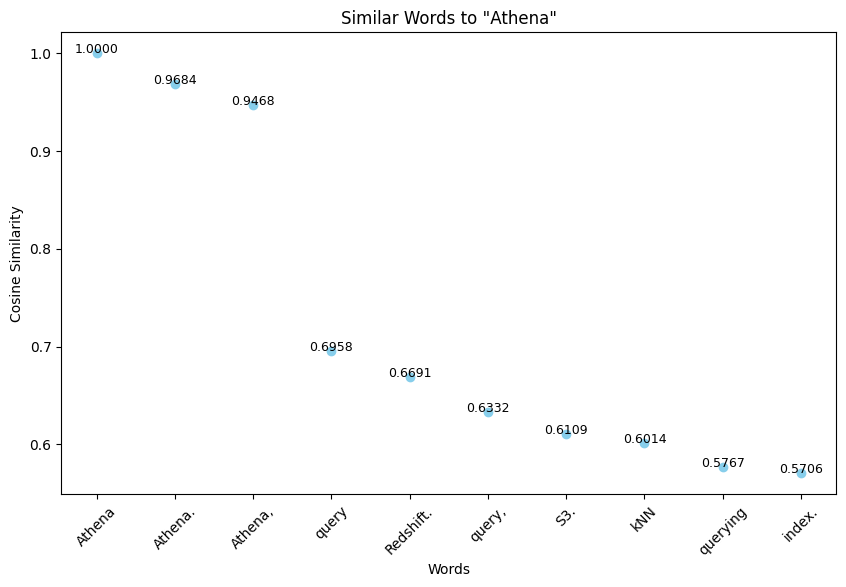

In [6]:
query_word = 'Athena'
similar_words = find_similar_words(query_word, model, annoy_index)
similarity_scores = calculate_similarity_scores(query_word, similar_words,model)
print(f"Similar words to '{query_word}':")
for word, score in zip(similar_words, similarity_scores):
    print(f"{word}: {score:.4f}")
plot_similar_words(query_word, similar_words, similarity_scores)